### Import packages

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# show image inline
%matplotlib inline

### Load dataset

In [2]:
label = pd.read_csv('./dataset/label.csv')
y = label['digit']

In [3]:
image_list = []
for name in label['name of the file']:
    path = './dataset/Digit/' + str(name) + '.jpg'
    img = mpimg.imread(path)
    image_list.append(img.flatten())

X = pd.DataFrame(image_list);

In [4]:
print("image data shape:",X.shape)
print("label data shaoe:",y.shape)

image data shape: (1797, 64)
label data shaoe: (1797,)


### Split data into training and testing data

In [5]:
X_train, X_test, label_train, label_test = train_test_split(X, label,  test_size=0.1, random_state=2)
y_train = label_train['digit']
y_test = label_test['digit']
y_test_name = label_test['name of the file']

### Create ANN model

In [6]:
ann = MLPClassifier(hidden_layer_sizes=(80,), # one hidden layer with 80 neurons
                    activation='logistic', # logistic sigmoid function
                    solver='adam', # stochastic gradient descent
                    alpha=1e-5, # regularization
                    random_state=1,
                    learning_rate_init = 0.002)

### Train ANN model

In [7]:
ann.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=1e-05, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(80,), learning_rate='constant',
       learning_rate_init=0.002, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

### Make prediction

In [8]:
y_predict = ann.predict(X_test)

### Accuracy of prediction

In [9]:
score = accuracy_score(y_test, y_predict)
print("Accuracy score: %0.2f" % score)

Accuracy score: 0.92


### Using GridSearchCV to find best number of neurons

In [10]:
# create a new ann classifier
ann = MLPClassifier(activation='logistic',
                    solver='adam',
                    alpha=1e-5,
                    random_state=1,
                    learning_rate_init = 0.002)

# set neurons of hidden layer to numbers between 50 and 200
params = { 'hidden_layer_sizes' : [[i] for i in range(50, 200)] }

In [11]:
# setup grid search and cross validation
CV_ann = GridSearchCV(estimator=ann, param_grid=params, cv=10, scoring='accuracy')

### Search for best hidden layer for ANN

In [12]:
CV_ann.fit(X, y);

In [13]:
best_neurons = CV_ann.best_params_['hidden_layer_sizes'][0]
print(best_neurons)

126


### Accuracy score by using one hidden layer and 126 neurons

In [14]:
ann = MLPClassifier(hidden_layer_sizes=(126,),
                    activation='logistic',
                    solver='adam',
                    alpha=1e-5,
                    random_state=1,
                    learning_rate_init = 0.002)
ann.fit(X_train, y_train)
y_predict = ann.predict(X_test)

In [15]:
score = accuracy_score(y_test, y_predict)
print("Accuracy score: %0.2f" % score)

Accuracy score: 0.93


### Confusion Matrix

In [16]:
confusion_matrix(y_test, y_predict)

array([[14,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 21,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0, 14,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 21,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 16,  0,  0,  1,  3,  1],
       [ 0,  0,  0,  0,  0, 16,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 17,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 17,  1,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 16,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 15]])

### Print misclassified images

In [17]:
def show_image(image_name, title):
    file_name = './dataset/Digit/' + str(image_name) + '.jpg'
    img = mpimg.imread(file_name)
    fig = plt.figure()
    fig.suptitle(title, fontsize=14, fontweight='bold')
    plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
    
def show_misclassified_images(y_test, y_predict):
    size = len(y_predict)
    for i in range(0, size):
        if y_test.iloc[i] != y_predict[i]:
            title = "Actual:" + str(y_test.iloc[i]) 
            title += " - Predicted:" + str(y_predict[i])
            show_image(y_test_name.iloc[i], title)

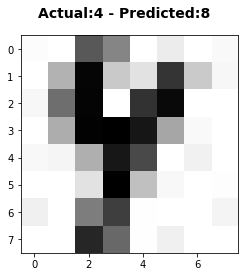

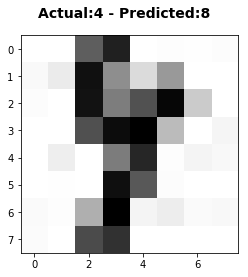

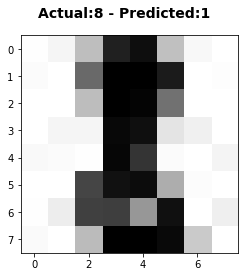

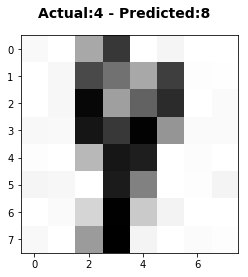

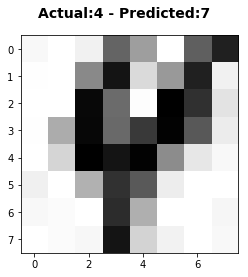

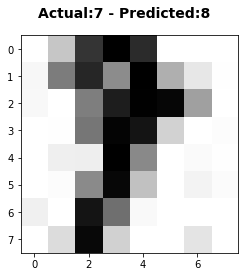

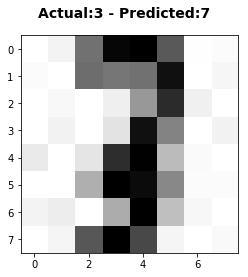

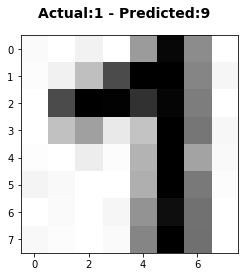

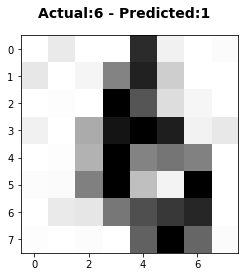

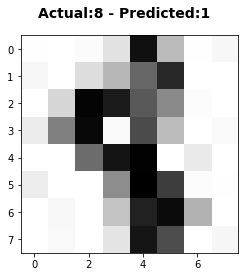

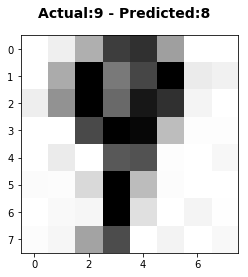

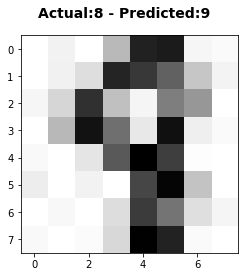

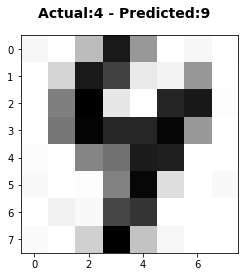

In [18]:
show_misclassified_images(y_test, y_predict)

### The highest accuracy i got by using ann with one hidden layer is 93%, and best number of neurons is 126.
### Most digits are correctly classified, but the accuracy for '4' is only 76%.
### It was misclassified five times, and three out of five times it was classified as '9'.